# 1a
A=0.30
#### $F_{\bigodot}=\sigma T_{\bigodot}=\frac{L_{\bigodot}}{A}$
#### $L_{\bigodot}=A \sigma T_{\bigodot}^4$
#### $F=\frac{L_{\bigodot}}{4 \pi d^2} \frac{\pi r^2}{4 \pi r^2}= \frac{L_{\bigodot}}{16 \pi d^2} (1-A)= \frac{L_{\bigodot}}{16 \pi d^2} (0.70)= \sigma T_{\bigodot}^4$
#### $T_{\bigodot}=(\frac{0.70L_{\bigodot}}{16 \pi d^2 \sigma})^{1/4}=254 K$


# 1b
#### $T_{\bigodot}=15 C ~or~ 288K$
#### $(1-A) \pi r^2 F_e= \theta T^44 \pi r^2$
#### $(1-A) \pi r^2 F_e + (1-A)\theta T^44 \pi r^2= \theta T^44 \pi r^2$
#### $(1-A)F_e=T^4(-4\sigma (1-A)+4\sigma)$
#### $(1-A)F_e=T^4(-4\sigma +4\sigma A+4\sigma)$
#### $\frac{(1-A)F_e}{4\sigma A}= T^4$
#### $T= 291K$

# 1c
#### $F= \pi \int_0^{\infty} (1-A(\lambda))B(\lambda,T) d\lambda $

# 1d
#### $A({\lambda})$
#### Water vapor  is the most abundant heat-trapping gas
#### Carbon dioxode is problematic

# 1e
Yes, We are in trouble. 

# 2a

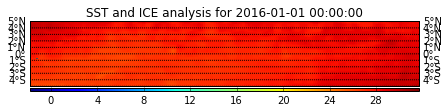

In [13]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
date = datetime(2016,1,1,0) # date to plot.
%matplotlib inline
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(llcrnrlon=-90,llcrnrlat=-5,urcrnrlon=-150,urcrnrlat=5,projection='mill')
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,90.,1.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[1,1,0,1])
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

# 2b

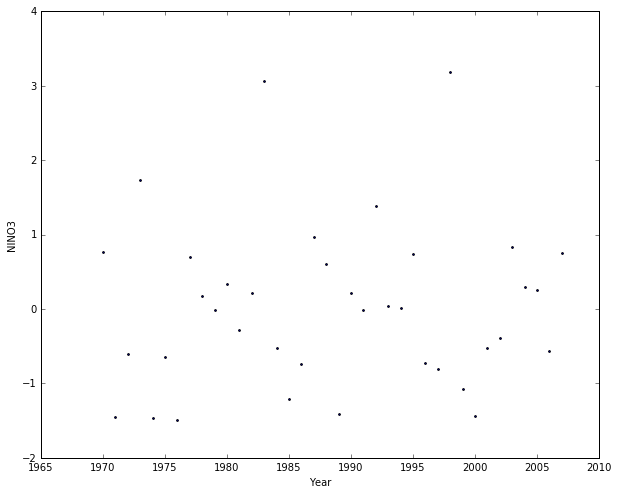

In [14]:
yearDat = np.loadtxt('calidata_final.dat', usecols=[0])
tempDat = np.loadtxt('calidata_final.dat', usecols=[1])
precDat = np.loadtxt('calidata_final.dat', usecols=[2])
snowDat = np.loadtxt('calidata_final.dat', usecols=[3])
NINO3Dat = np.loadtxt('calidata_final.dat', usecols=[4])
fig = plt.figure(1, figsize=(10,8))
plt.scatter(yearDat, NINO3Dat, s=3)
plt.xlabel("Year")
plt.ylabel("NINO3")

# 2c
The five largest events happened in 1998, 1983, 1973, 1992, 1987

# 2d
There is some similarities but they are not exactly the same

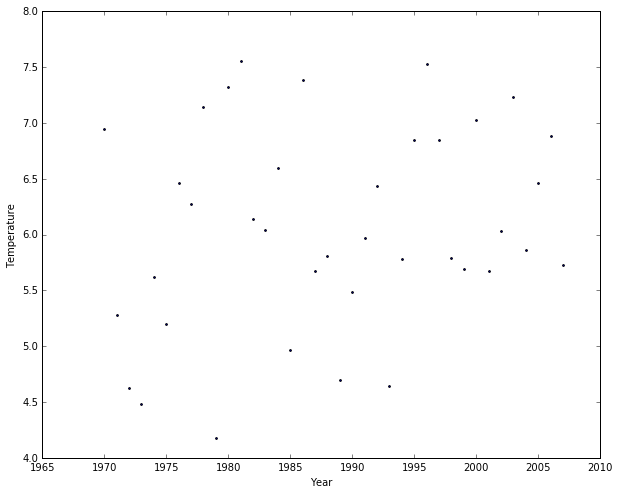

In [17]:
fig = plt.figure(1, figsize=(10,8))
plt.scatter(yearDat, tempDat, s=3)
plt.xlabel("Year")
plt.ylabel("Temperature")

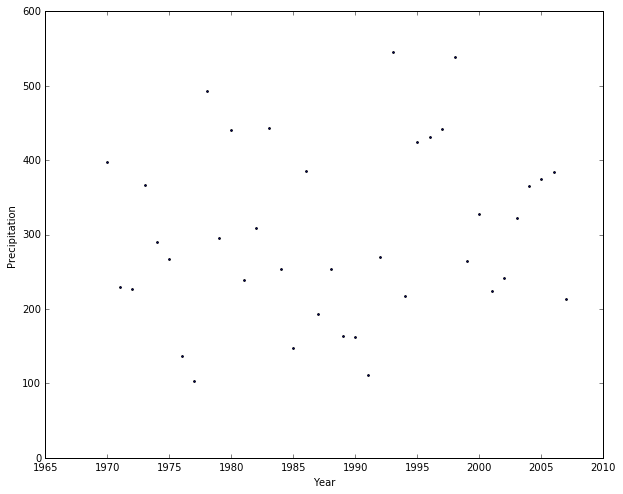

In [16]:
fig = plt.figure(1, figsize=(10,8))
plt.scatter(yearDat, precDat, s=3)
plt.xlabel("Year")
plt.ylabel("Precipitation")

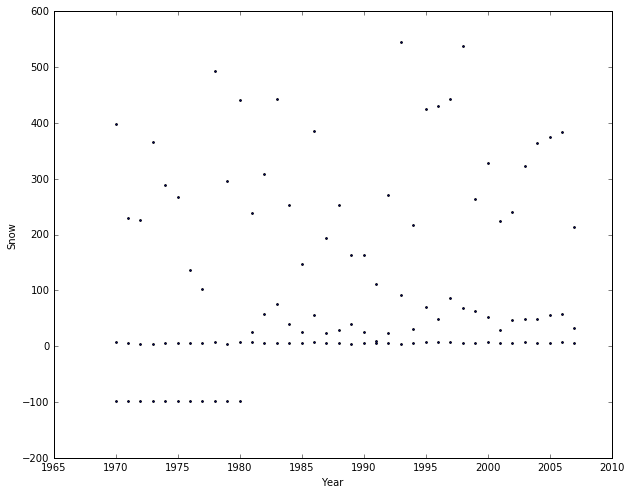

In [15]:
fig = plt.figure(1, figsize=(10,8))
plt.scatter(yearDat, snowDat, s=3)
plt.xlabel("Year")
plt.ylabel("Snow")

# 2e

# 2f